In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
%matplotlib inline

In [2]:
file_names = []
for root, dirs, files in os.walk('tb_files/MC-V1-2018/for-chart'):
    for fname in files:
        full_fname = os.path.join(root, fname)
        file_names.append({'loc':full_fname, 'type':fname})

In [3]:
file_names[0]['type']

's-090k_e-3'

In [4]:
event_path = 'tb_files/MC-V1-2018/steps-090k/events.out.tfevents.1573531925.5cae4c63838d'

In [5]:
datas = []
step, loss, eval_acc = None, None, None
for file_name in file_names:
    for event in tf.train.summary_iterator(file_name['loc']):
        for value in event.summary.value:
            if value.tag == 'eval_acc':
                if value.HasField('simple_value'):
                    step = event.step
                    eval_acc = value.simple_value
            if value.tag == 'loss':
                if value.HasField('simple_value'):
                    loss = value.simple_value
            
            if step != None and loss != None and eval_acc != None:
                datas.append({'type':file_name['type'], 'step':step, 'loss':loss, 'eval_acc':eval_acc})
                step, loss, eval_acc = None, None, None

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [6]:
len(datas)

198

In [7]:
df = pd.DataFrame(datas)

In [8]:
df.head()

,type,step,loss,eval_acc
0,s-090k_e-3,1000,2.526581,0.4289
1,s-090k_e-3,2000,1.775786,0.5163
2,s-090k_e-3,3000,1.604802,0.5400
3,s-090k_e-3,4000,1.495037,0.5622
4,s-090k_e-3,5000,1.468318,0.5613


In [9]:
df.groupby('type')['eval_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
s-090k_e-3,37.0,0.581857,0.032641,0.4289,0.571600,0.59250,0.600800,0.6056
s-190k_e-3,37.0,0.592489,0.027470,0.4556,0.589200,0.60120,0.608100,0.6131
s-230k_e-3,37.0,0.594649,0.026948,0.4624,0.588000,0.60250,0.609800,0.6142
s-230k_e-4,50.0,0.595586,0.013711,0.5300,0.594225,0.59725,0.604175,0.6109
s-310k_e-3,37.0,0.595286,0.026252,0.4628,0.591400,0.60330,0.609600,0.6135


In [10]:
df.groupby('type')['eval_acc'].unstack().plot()

AttributeError: Cannot access callable attribute 'unstack' of 'SeriesGroupBy' objects, try using the 'apply' method

In [90]:
df2 = pd.DataFrame({'pig': [20, 18, 489, 675, 1776],'horse': [4, 25, 281, 600, 1900]}, index=[1990, 1997, 2003, 2009, 2014])

In [91]:
df2.head()

,pig,horse
1990,20,4
1997,18,25
2003,489,281
2009,675,600
2014,1776,1900


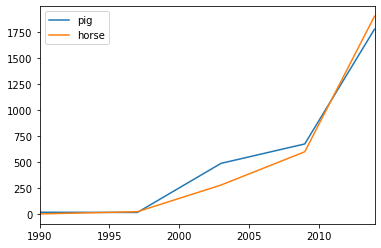

In [94]:
lines = df2.plot.line()